# NOT FOR TURN IN

Suggestions

- Add legend to plots
- Add discussion of results for each solution


# ME 7160 - Harmonic Balance Project
- Due Date: 12/15
### Contributers


- Admir Makas
- Shashankashekhar Dutta
- Alec Blankenship

# Introduction
-Harmonic Balance brief history/use
-problems we looked at
    -Linear, duffing, and van der pol models
-Application
-Limitations
    -Models over one period at steady state
    
# Harmonic Balance Overview
    


# Solution to linear model

#### Following linear equation was solved as a verification of the method

**$\ddot{x} + \dot{x} + x = cos(2t)sin(5t)$**

Since method of harmonic balance is valid for steady state response the particular solution to the above problem was also plotted to compare with the numerical results:

**$X_p = Acos(2t)cos(5t) + Bsin(2t)sin(5t) + Ccos(2t)sin(5t) + Dsin(2t)cos(5t)$**, where

- A = $\frac{-3785}{171769}$


- B = $\frac{-3274}{171769}$


- C = $\frac{-11164}{171769}$


- D = $\frac{7660}{171769}$

         Current function value: 0.000306
         Iterations: 76
         Function evaluations: 8603
         Gradient evaluations: 121
Values of x after optimization:
[-0.02414813 -0.04394757 -0.05832952 -0.06529561 -0.06467242 -0.05798953
 -0.0477835  -0.03660816 -0.02613954 -0.01671877 -0.00749774  0.00289052
  0.01542504  0.02993721  0.04482445  0.05737573  0.06460377  0.06427422
  0.05573837  0.04024562  0.0206088   0.00034205 -0.01740789 -0.03074064
 -0.03937247 -0.0443804  -0.04744796 -0.04993327 -0.05214559 -0.05312855
 -0.05104227 -0.04399377 -0.03098159 -0.01256868  0.00900139  0.03031567
  0.04775706  0.05857229  0.0616494   0.05772196  0.04893686  0.03796638
  0.02701637  0.01711588  0.00795565 -0.00167908 -0.01307464 -0.0267076
 -0.0416904  -0.05578861 -0.06602778 -0.06967158 -0.06520114 -0.05291808
 -0.03493389 -0.01454188  0.00479668  0.02047463  0.03139295  0.03801716
  0.04184199  0.0445005   0.04689017  0.04867642  0.04837921  0.044012
  0.03401799  0.0181241  -0.002

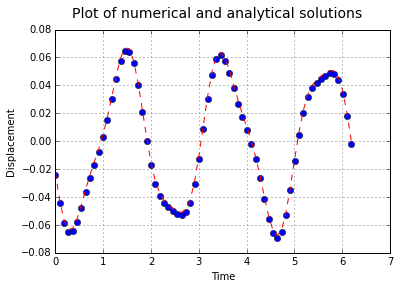

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 70 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

A = (-3785/171769)
B = (-3274/171769)
C = (-11164/171769)
D = (7660/171769)

Analytical = (A)*np.cos(2*t)*np.cos(5*t) + (B)*np.sin(2*t)*np.sin(5*t) + (C)*np.cos(2*t)*np.sin(5*t)\
            + (D)*np.sin(2*t)*np.cos(5*t)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot(t, sol.x, 'bo') #FFT solution plot
plt.plot(t, Analytical, 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')

plt.grid()
plt.show()

# Solution to Duffing Equation with Forcing Term:

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + \dot{x} + x + x^3 = cos(2t)sin(5t)$**



         Current function value: 0.000013
         Iterations: 64
         Function evaluations: 5622
         Gradient evaluations: 110
Values of x after optimization:
[-0.02259564 -0.04908077 -0.06306997 -0.06208653 -0.05023662 -0.03462547
 -0.02027249 -0.00731665  0.00752811  0.02659214  0.04752091  0.06329355
  0.06623227  0.05317132  0.02798094 -0.00047591 -0.02354001 -0.03740824
 -0.04401404 -0.0477621  -0.05083988 -0.0508371  -0.04257347 -0.02275648
  0.00614985  0.03596072  0.05694853  0.0633088   0.05607115  0.04147434
  0.02615288  0.01277822 -0.00065645 -0.01755946 -0.03819747 -0.05759518
 -0.06773707 -0.0626406  -0.04262072 -0.0145674   0.01204663  0.03059456
  0.04032354  0.04498979  0.04840962  0.05051333  0.04703063  0.03309806
  0.00801465]


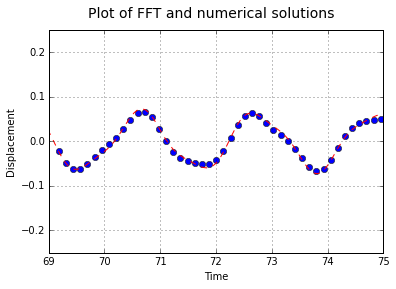

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t = t[0:-1]


x0=np.ones(N-1)
#x0=np.cos(2*t)

f = np.cos(2*t)*np.sin(5*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + xdot + x + x**3 - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution for comparison
from scipy.integrate import odeint

def deriv(x, t):
    return np.array([x[1], -0.25*x[1] - x[0] - x[0]**3 + np.cos(2*t)*np.sin(5*t)])

time = np.linspace(0.0, 100, 2000)
xinit=np.array([0,0])
x = odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((22.022*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:, 0], 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of FFT and numerical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([69, 75, -0.25, 0.25])
plt.grid()
plt.show()

# Solution to Van der Pol oscilator #1:

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + (x^2 - 1)\dot{x} + x = cos(t)sin(4t)$**

         Current function value: 0.649413
         Iterations: 116
         Function evaluations: 7712
         Gradient evaluations: 154
Values of x after optimization:
[ 1.07243869  1.35534248  1.59326853  1.77447622  1.89683578  1.96532929
  1.98791877  1.97287707  1.92794199  1.86023087  1.77604493  1.68030803
  1.57584123  1.46285838  1.33901803  1.20014247  1.04140086  0.85854544
  0.64880177  0.41124296  0.14679754 -0.14166566 -0.44861094 -0.76429098
 -1.07340138 -1.35629355 -1.59412229 -1.77517684 -1.89737133 -1.96571907
 -1.9881949  -1.97307503 -1.92809257 -1.86035814 -1.77616628 -1.68043562
 -1.57598349 -1.46302092 -1.3392054  -1.20035943 -1.04165427 -0.85884505
 -0.64916151 -0.41168031 -0.14733237  0.14101379  0.44783148  0.76339632]


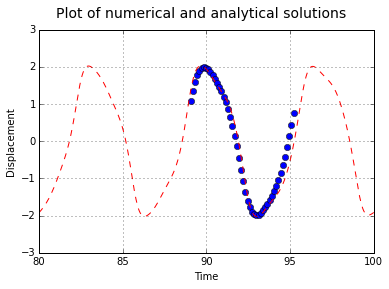

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 49 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 1

#x0=1.5*np.ones(N-1)
#x0=1.48*np.cos(1*t)
x0=3.0*np.sin(4*t)*np.cos(1*t)

f = F*np.cos(1*t)*np.sin(4*t)
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos(1*t)*np.sin(4*t)])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((28.35*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([80, 100, -3, 3])
plt.grid()
plt.show()

# Solution to Van der Pol oscilator #2

#### Following equation to be solved using the harmonic balance method. Solution is plotted with numerically solved for solution to show accuracy

**$\ddot{x} + (x^2 - 1)\dot{x} + x = Fcos(2\pi t)$**

         Current function value: 0.144054
         Iterations: 322
         Function evaluations: 19596
         Gradient evaluations: 384
Values of x after optimization:
[-1.78740428 -1.65269944 -1.50002124 -1.34784981 -1.21141858 -1.09330421
 -0.97932847 -0.84449876 -0.66483134 -0.42856892 -0.14043956  0.18122275
  0.51290258  0.83558019  1.14001928  1.4222301   1.67300199  1.87337242
  2.00303767  2.05376728  2.0351321   1.97074077  1.88946199  1.8155067
  1.75933776  1.71389714  1.65951218  1.57605141  1.45449902  1.3013451
  1.13422617  0.97193143  0.82313651  0.67957372  0.51810627  0.31139061
  0.04149257 -0.28972099 -0.65672602 -1.01631413 -1.3261315  -1.5662616
 -1.74368179 -1.87544704 -1.97037086 -2.0239575  -2.02794754 -1.98082947
 -1.89514687]


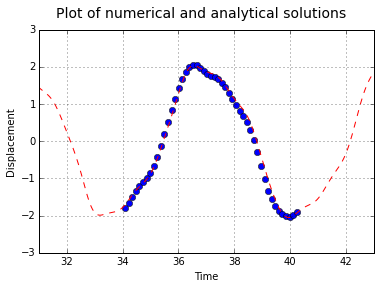

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

N = 50 #define number of sample points
t=np.linspace(0, 2*np.pi, N)
t=t[0:-1]

F = 2

#x0=1*np.ones(N-1)
x0=1*np.cos((2*np.pi*t)/1)
#x0=2.0*np.sin(1*t)*np.cos(1*t)

f = F*np.cos((2*np.pi*t))
freq = np.fft.fftfreq(N-1, 1/(N-1))+.00000000001 #define Fourier Transform sample frequencies

# Function resFun defines a residual term that will be used in the optimization operation
def resFun(x):
    X = np.fft.fft(x)
    xddot = np.fft.ifft(-freq**2*X)
    xdot = np.fft.ifft(1j*freq*X)
    res = xddot + (x**2 - 1)*xdot + x - f
    RES = np.sum(np.abs(res**2))
    return RES

# Goal of the function is to minimize error between solution guess x0 and response in order to
# converge to a solution
from scipy.optimize import minimize
sol = minimize(resFun, x0, method = 'BFGS', options={'maxiter':50000, 'disp':True})
#sol = minimize(resFun, x0)

print('Values of x after optimization:')
print(sol.x)

#Optional to plot Jacobian of the minimize function
#print(sol.jac)

#Numerical solution
from scipy.integrate import odeint
def deriv(x,t):
    return np.array([x[1], -(x[0]**2 - 1)*x[1] - x[0] + F*np.cos((2*np.pi*t))])

time=np.linspace(0.0,100,2000)
xinit=np.array([-2.0, 0])
x=odeint(deriv, xinit, time)

#Plot of numerical and analytical solutions
fig = plt.figure()
plt.plot((10.85*np.pi)+t, sol.x, 'bo') #FFT solution plot
plt.plot(time, x[:,0] , 'r--') #analytical steady state solution to the above posed problem
fig.suptitle('Plot of numerical and analytical solutions', fontsize = 14)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.axis([31, 43, -3, 3])
plt.grid()
plt.show()

### Results from the optimization above can be used to approximate a fitted function that can be used as desired. Assume the following solution:

### $x(t) = A_o + A_1cos(\omega t + \beta) + A_2cos(2\omega t + 2\beta) + A_3cos(3\omega t + 3\beta) +  A_4cos(4\omega t + 4\beta) +  A_5cos(5\omega t + 5\beta) +  A_6cos(6\omega t + 6\beta) +  A_7cos(7\omega t + 7\beta) +  A_8cos(8\omega t + 8\beta)$

#### Here coefficients $A_o$, $A_1$, $A_2$, $A_3$, $A_4$, $A_5$, $A_6$, $A_7$, $A_8$, $\omega$, $\beta$ are the unknowns and will be solved for using least square fitting

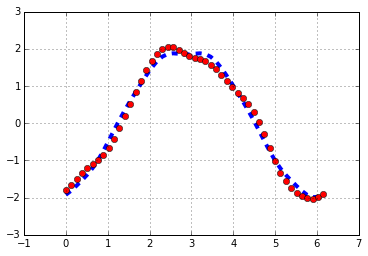

Coefficient values listed below
[ 0.11721937 -1.97111339 -0.11427528  0.03877161 -0.03371013  0.01572153
 -0.03638984 -0.00500907 -0.00485335  1.02486243  0.1883517 ]


In [14]:
#Define function to be called in the "leastsq" function
def errorFun(p, t):
    A0, A1, A2, A3, A4, A5, A6, A7, A8, omega, beta = p
    err = sol.x - (A0 + A1*np.cos(omega*t + beta) + A2*np.cos(2*omega*t + 2*beta)\
                   + A3*np.cos(3*omega*t + 3*beta) + A4*np.cos(4*omega*t + 4*beta)\
                   + A5*np.cos(5*omega*t + 5*beta) + A6*np.cos(6*omega*t + 6*beta)\
                   + A7*np.cos(7*omega*t + 7*beta) + A8*np.cos(8*omega*t + 8*beta))
    return err

#Initial guess for coefficients
p0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#print(np.array(p0))

#Least square calculation
from scipy.optimize import leastsq
plsq = leastsq(errorFun, p0, args=(t))

#Function used for plotting purposes
def peval(t, p):
    return p[0] + p[1]*np.cos(p[9]*t + p[10]) + p[2]*np.cos(2*p[9]*t + 2*p[10])\
                + p[3]*np.cos(3*p[9]*t + 3*p[10]) + p[4]*np.cos(4*p[9]*t + 4*p[10])\
                + p[5]*np.cos(5*p[9]*t + 5*p[10]) + p[6]*np.cos(6*p[9]*t + 6*p[10])\
                + p[7]*np.cos(7*p[9]*t + 7*p[10]) + p[8]*np.cos(8*p[9]*t + 8*p[10])

#Plot numerical and least square results
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t, peval(t, plsq[0]), 'b--', linewidth = 4)
plt.plot(t, sol.x, 'ro')
plt.axis([-1, 7, -3, 3])
plt.grid()
plt.show()

coeff = plsq[0]

#Plot calculated results the coefficients
print('Coefficient values listed below')
print(plsq[0])

### Fitted equation can be seen below:


In [15]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

time=sp.Symbol('t', real = True)

A0=sp.nsimplify(round(coeff[0], 2))
A1=sp.nsimplify(round(coeff[1], 2))
A2=sp.nsimplify(round(coeff[2], 2))
A3=sp.nsimplify(round(coeff[3], 2))
A4=sp.nsimplify(round(coeff[4], 2))
A5=sp.nsimplify(round(coeff[5], 2))
A6=sp.nsimplify(round(coeff[6], 2))
A7=sp.nsimplify(round(coeff[7], 2))
A8=sp.nsimplify(round(coeff[8], 2))
omega=sp.nsimplify(round(coeff[9], 2))
beta=sp.nsimplify(round(coeff[10], 2))

ans = A0 + A1*sp.cos(omega*time + beta) + A2*sp.cos(2*omega*time + 2*beta)\
         + A3*sp.cos(3*omega*time + 3*beta) + A4*sp.cos(4*omega*time + 4*beta)\
         + A5*sp.cos(5*omega*time + 5*beta) + A6*sp.cos(6*omega*time + 6*beta)\
         + A7*sp.cos(7*omega*time + 7*beta) + A8*sp.cos(8*omega*time + 8*beta)
ans

         ⎛51⋅t    19⎞         ⎛51⋅t   19⎞      ⎛153⋅t    57⎞        ⎛102⋅t   1
  197⋅cos⎜──── + ───⎟   11⋅cos⎜──── + ──⎟   cos⎜───── + ───⎟   3⋅cos⎜───── + ─
         ⎝ 50    100⎠         ⎝ 25    50⎠      ⎝  50    100⎠        ⎝  25    2
- ─────────────────── - ───────────────── + ──────────────── - ───────────────
          100                  100                 25                 100     

9⎞      ⎛51⋅t   19⎞      ⎛153⋅t   57⎞      ⎛357⋅t   133⎞     
─⎟   cos⎜──── + ──⎟   cos⎜───── + ──⎟   cos⎜───── + ───⎟     
5⎠      ⎝ 10    20⎠      ⎝  25    50⎠      ⎝  50    100⎠   3 
── + ────────────── - ─────────────── - ──────────────── + ──
           50                25               100          25

# Conclusions and discussion